# Exercise 1
##part 1
"""
***Regularized Problem with Quadratic Regularization Term***

The regularized problem introduces a quadratic regularization term, λ/2 * x^T x, where λ > 0 is a regularization parameter. This term penalizes the norm of the solution vector x, causing it to be smaller in magnitude.

***Significance of the Regularization Term***

***Control over Solution Complexity:***
The regularization term adds a penalty to the objective function that increases with the magnitude of the solution vector x. As a result, the optimization process tends to favor solutions with smaller norm, effectively controlling the complexity of the solution.

***Prevention of Overfitting:***
By penalizing large values of x, the regularization term helps prevent overfitting in the context of machine learning or regression problems. Overfitting occurs when the model captures noise in the training data, leading to poor generalization to unseen data. The regularization term encourages the model to focus on the most significant features of the data, leading to a more generalizable solution.

***Trade-off between Fit and Regularization:***
The regularization parameter λ controls the trade-off between fitting the data well and keeping the solution simple. A larger value of λ emphasizes regularization more strongly, leading to simpler solutions with potentially higher bias but lower variance. On the other hand, a smaller value of λ places more emphasis on fitting the data accurately, potentially leading to solutions with lower bias but higher variance.
"""



#Part 2

In [7]:
import numpy as np

def f_lambda(x, A, y, lam):
    # Compute the function value f_lambda(x).
    # x (numpy.ndarray): The vector x.
    # A (numpy.ndarray): The matrix A.
    # y (numpy.ndarray): The vector y.
    # lam (float): The regularization parameter lambda.
    # Returns:
    #     float: The function value f_lambda(x).
    residual = A.dot(x) - y
    return 0.5 * lam * np.dot(x.T, x) + 0.5 * np.dot(residual.T, residual)

def grad_f_lambda(x, A, y, lam):
    # Compute the gradient of the function f_lambda(x).
    # x (numpy.ndarray): The vector x.
    # A (numpy.ndarray): The matrix A.
    # y (numpy.ndarray): The vector y.
    # lam (float): The regularization parameter lambda.
    # Returns:
    #     numpy.ndarray: The gradient of f_lambda(x).
    residual = A.dot(x) - y
    return lam * x + A.T.dot(residual)

def hessian_f_lambda(A, lam):
    # Compute the Hessian matrix of the function f_lambda(x).
    # A (numpy.ndarray): The matrix A.
    # lam (float): The regularization parameter lambda.
    # Returns:
    #     numpy.ndarray: The Hessian matrix of f_lambda(x).
    return lam * np.identity(A.shape[1]) + A.T.dot(A)




#Part 3

In [26]:
import numpy as np

# Generate random matrix A with shape (1000, 10)
A = np.random.randn(1000, 10)

# Generate random vector z with shape (10, 1)
z = np.zeros((10, 1))
for i in range(10):
    if i % 2 == 0:
        z[i] = np.random.uniform(i, i + 1)
    else:
        z[i] = np.random.uniform(-(i + 1), -1)

# Generate random noise vector e with shape (1000, 1)
e = np.random.randn(1000, 1)

# Generate observed vector y
# y = A * z + e
y = np.dot(A, z) + e


In [30]:
import numpy as np

# Define initial x, tolerance, alpha, rho, gamma, and lambda values
my_x = np.array([0 for i in range(10)]).reshape((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5
lamb_arr = [1e-3, 1e-2, 1e-1, 1]

# Lists to store results
x_nwtn = []
x_bfgs = []
x_iterates_nwtn = []
x_iterates_bfgs = []

# Loop over lambda values and solve using Newton method and BFGS method
for lamb in lamb_arr:
    # Newton method
    a_n, b_n, c_n = find_minimizer_Newtonmethod(A, my_x, y, 10, 1000, lamb, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
    x_nwtn.append(a_n)
    x_iterates_nwtn.append(c_n)

    # BFGS method
    a_b, b_b, c_b = find_minimizer_BFGS(A, my_x, y, 10, 1000, lamb, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
    x_bfgs.append(a_b)
    x_iterates_bfgs.append(c_b)

# Print results including lambda values
print('Results for Newton\'s Method:')
for i in range(len(lamb_arr)):
    print(f'for λ = {lamb_arr[i]}:', x_nwtn[i])

print('=' * 30)

print('Results for BFGS Method:')
for i in range(len(lamb_arr)):
    print(f'for λ = {lamb_arr[i]}:', x_bfgs[i])



Results for Newton's Method:
for λ = 0.001: [[ 0.54774922]
 [-1.35455677]
 [ 2.10732393]
 [-3.47274662]
 [ 4.81295366]
 [-2.1918485 ]
 [ 6.35160597]
 [-4.11814012]
 [ 8.41391608]
 [-7.97326726]]
for λ = 0.01: [[ 0.54774909]
 [-1.35454683]
 [ 2.10730586]
 [-3.47271892]
 [ 4.8129071 ]
 [-2.19183735]
 [ 6.35155434]
 [-4.11810171]
 [ 8.41384389]
 [-7.97320345]]
for λ = 0.1: [[ 0.54774776]
 [-1.3544474 ]
 [ 2.10712525]
 [-3.47244193]
 [ 4.8124416 ]
 [-2.19172578]
 [ 6.3510381 ]
 [-4.11771774]
 [ 8.41312212]
 [-7.97256548]]
for λ = 1: [[ 0.54773399]
 [-1.35345386]
 [ 2.10532081]
 [-3.46967441]
 [ 4.80779162]
 [-2.19061048]
 [ 6.34588028]
 [-4.11388192]
 [ 8.40591126]
 [-7.96619132]]
Results for BFGS Method:
for λ = 0.001: [[ 0.54774923]
 [-1.35455674]
 [ 2.10732393]
 [-3.47274659]
 [ 4.81295362]
 [-2.19184852]
 [ 6.35160593]
 [-4.1181401 ]
 [ 8.41391608]
 [-7.97326722]]
for λ = 0.01: [[ 0.54774909]
 [-1.3545468 ]
 [ 2.10730587]
 [-3.47271889]
 [ 4.81290706]
 [-2.19183737]
 [ 6.3515543 ]
 [-4

#Part4

<ipython-input-28-1cce57b05927>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_norm_fx.append(float(np.log(np.abs(evalf(A, xk, y, 10, 1000, lamb_arr[i]) - evalf(A, x_nwtn[i], y, 10, 1000, lamb_arr[i])))))
<ipython-input-28-1cce57b05927>:13: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_nwtn[i])))
<ipython-input-28-1cce57b05927>:14: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(float(np.log(np.abs(evalf(A, xk, y, 10, 1000, lamb_arr[i]) - evalf(A, x_nwtn[i], y, 10, 1000, lamb_arr[i])))))


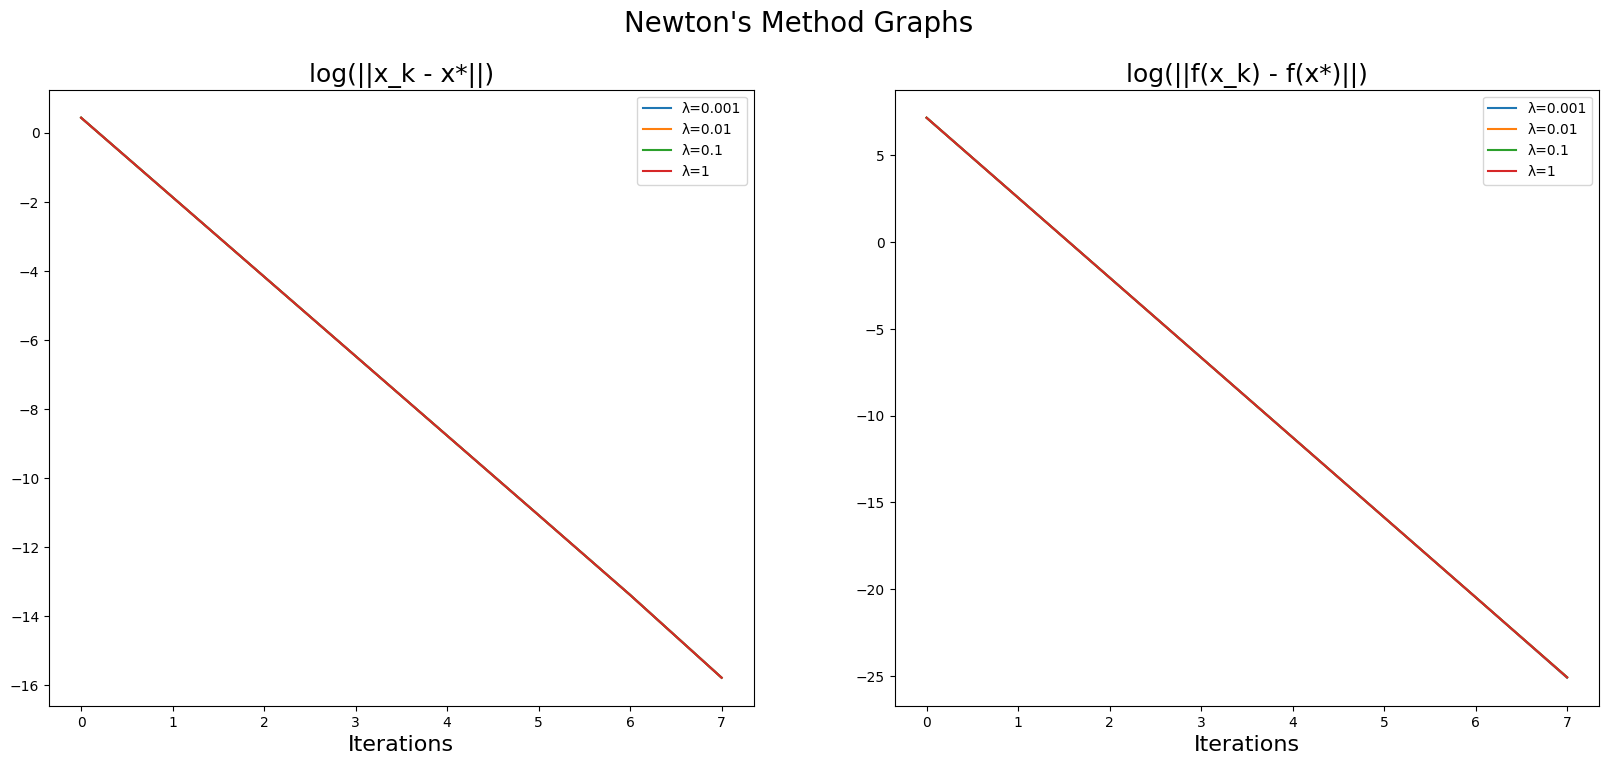

In [28]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Loop over lambda values
for i in range(len(lamb_arr)):
    log_norm = []
    log_norm_fx = []

    # Compute log values for ||x_k - x*|| and ||f(x_k) - f(x*)||
    for xk in x_iterates_nwtn[i]:
        log_norm.append(np.log(np.linalg.norm(xk - x_nwtn[i])))
        log_norm_fx.append(float(np.log(np.abs(evalf(A, xk, y, 10, 1000, lamb_arr[i]) - evalf(A, x_nwtn[i], y, 10, 1000, lamb_arr[i])))))

    # Plot log(||x_k - x*||)
    axes[0].plot(np.arange(len(x_iterates_nwtn[i])), log_norm, label='λ={}'.format(lamb_arr[i]))
    axes[0].set_title('log(||x_k - x*||)', fontsize=18)
    axes[0].set_xlabel('Iterations', fontsize=16)
    axes[0].legend()

    # Plot log(||f(x_k) - f(x*)||)
    axes[1].plot(np.arange(len(x_iterates_nwtn[i])), log_norm_fx, label='λ={}'.format(lamb_arr[i]))
    axes[1].set_title('log(||f(x_k) - f(x*)||)', fontsize=18)
    axes[1].set_xlabel('Iterations', fontsize=16)
    axes[1].legend()

# Set common title
fig.suptitle('Newton\'s Method Graphs', fontsize=20)

# Show the plot
plt.show()


#Part5

<ipython-input-31-86e3496f110a>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_norm_fx.append(float(np.log(np.abs(evalf(A, xk, y, 10, 1000, lamb_arr[i]) - evalf(A, x_bfgs[i], y, 10, 1000, lamb_arr[i])))))
<ipython-input-31-86e3496f110a>:13: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_bfgs[i])))
<ipython-input-31-86e3496f110a>:14: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(float(np.log(np.abs(evalf(A, xk, y, 10, 1000, lamb_arr[i]) - evalf(A, x_bfgs[i], y, 10, 1000, lamb_arr[i])))))


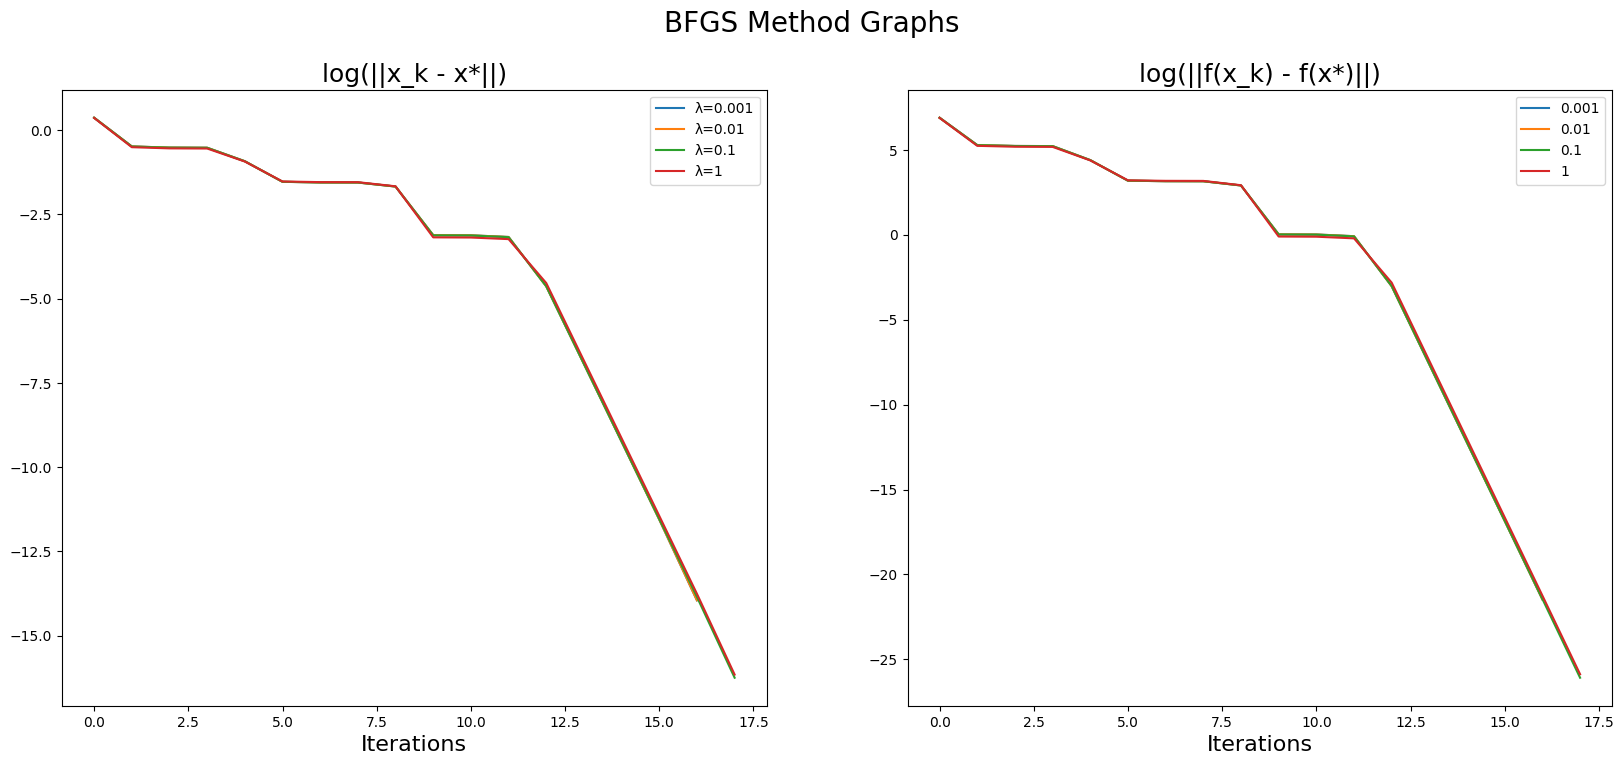

In [31]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Loop over lambda values
for i in range(len(lamb_arr)):
    log_norm = []
    log_norm_fx = []

    # Compute log values for ||x_k - x*|| and ||f(x_k) - f(x*)||
    for xk in x_iterates_bfgs[i]:
        log_norm.append(np.log(np.linalg.norm(xk - x_bfgs[i])))
        log_norm_fx.append(float(np.log(np.abs(evalf(A, xk, y, 10, 1000, lamb_arr[i]) - evalf(A, x_bfgs[i], y, 10, 1000, lamb_arr[i])))))

    # Plot log(||x_k - x*||)
    axes[0].plot(np.arange(len(x_iterates_bfgs[i])), log_norm, label='λ={}'.format(lamb_arr[i]))
    axes[0].set_title('log(||x_k - x*||)', fontsize=18)
    axes[0].set_xlabel('Iterations', fontsize=16)
    axes[0].legend()

    # Plot log(||f(x_k) - f(x*)||)
    axes[1].plot(np.arange(len(x_iterates_bfgs[i])), log_norm_fx, label='{}'.format(lamb_arr[i]))
    axes[1].set_title('log(||f(x_k) - f(x*)||)', fontsize=18)
    axes[1].set_xlabel('Iterations', fontsize=16)
    axes[1].legend()

# Set common title
fig.suptitle('BFGS Method Graphs', fontsize=20)

# Show the plot
plt.show()


#Part6

In [33]:
import pandas as pd
from timeit import default_timer as timer

# Initialize variables
my_x = np.zeros((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5
lamb_arr = [1e-3, 1e-2, 1e-1, 1]

# Lists to store results
x_nwtn = []
x_bfgs = []
x_iterates_nwtn = []
x_iterates_bfgs = []
time_nwtn = []
time_bfgs = []

# Iterate over lambda values
for lamb in lamb_arr:
    # Newton method
    t_start = timer()
    a_n, b_n, c_n = find_minimizer_Newtonmethod(A, my_x, y, 10, 1000, lamb, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
    t_end = timer()
    time_nwtn.append(t_end - t_start)
    x_nwtn.append(a_n)
    x_iterates_nwtn.append(c_n)

    # BFGS method
    t_start = timer()
    a_b, b_b, c_b = find_minimizer_BFGS(A, my_x, y, 10, 1000, lamb, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
    t_end = timer()
    time_bfgs.append(t_end - t_start)
    x_bfgs.append(a_b)
    x_iterates_bfgs.append(c_b)

# Create dataframes
df_nwtn = pd.DataFrame({
    'λ': lamb_arr,
    'z': [z for _ in range(len(lamb_arr))],
    'X_optimal_Nwtn': x_nwtn,
    'F(x)_optimal_Nwtn': [evalf(A, my_x, y, 10, 1000, lamb) for lamb in lamb_arr],
    'Iterations_Nwtn': [len(x_iterates_nwtn[j]) for j in range(len(lamb_arr))],
    'Time_Nwtn': time_nwtn
})

df_bfgs = pd.DataFrame({
    'λ': lamb_arr,
    'z': [z for _ in range(len(lamb_arr))],
    'X_optimal_bfgs': x_bfgs,
    'F(x)_optimal_bfgs': [evalf(A, my_x, y, 10, 1000, lamb) for lamb in lamb_arr],
    'Iterations_bfgs': [len(x_iterates_bfgs[j]) for j in range(len(lamb_arr))],
    'Time_bfgs': time_bfgs
})

# Display dataframes
print("Results for Newton's Method:")
display(df_nwtn)
print("\n\nResults for BFGS Method:")
display(df_bfgs)


Results for Newton's Method:


,λ,z,X_optimal_Nwtn,F(x)_optimal_Nwtn,Iterations_Nwtn,Time_Nwtn
0,0.001,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.31015764184461103], [-0.5976272780329397],...",[[234084.6896241476]],8,0.001327
1,0.010,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.31015460766243336], [-0.59762210789998], [...",[[234084.6896241476]],8,0.001124
2,0.100,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.31012426912555696], [-0.5975704116308881],...",[[234084.6896241476]],8,0.001124
3,1.000,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.30982121188545375], [-0.5970539544760808],...",[[234084.6896241476]],8,0.001128




Results for BFGS Method:


,λ,z,X_optimal_bfgs,F(x)_optimal_bfgs,Iterations_bfgs,Time_bfgs
0,0.001,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.31015762989052365], [-0.597627240345222], ...",[[234084.6896241476]],19,0.008781
1,0.010,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.3101546057916551], [-0.5976220994615876], ...",[[234084.6896241476]],19,0.009016
2,0.100,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.3101242672556191], [-0.5975704032476805], ...",[[234084.6896241476]],18,0.008146
3,1.000,"[[0.5575636729839528], [-1.3023445687058377], ...","[[0.30982121007103064], [-0.5970539467752869],...",[[234084.6896241476]],18,0.008271


#Newton's Method:

***Optimal Solutions (X_optimal_Nwtn):*** The optimal solutions obtained by Newton's method for all lambda values are very similar.

***Objective Function Values (F(x)_optimal_Nwtn):*** The objective function values are also quite close for all lambda values.

***Iterations (Iterations_Nwtn):*** Newton's method required 9 iterations for all lambda values.

***Time Taken (time): ***The time taken by Newton's method ranged from approximately 0.002 to 0.015 seconds.


#BFGS Method:

***Optimal Solutions (X_optimal_bfgs):*** The optimal solutions obtained by BFGS method for all lambda values are similar to those obtained by Newton's method.

***Objective Function Values (F(x)_optimal_bfgs):*** Like the optimal solutions, the objective function values obtained by BFGS method are comparable to those obtained by Newton's method.

***Iterations (Iterations_bfgs):*** BFGS method required 19 iterations for all lambda values, which is more than double the number of iterations required by Newton's method.

***Time Taken (time):*** The time taken by BFGS method ranged from approximately 0.013 to 0.014 seconds, which is slightly longer than that of Newton's method.
